In [48]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras import layers

In [49]:
dataset=tf.keras.datasets.mnist
#dataset=tf.keras.datasets.cifar10
#dataset=tf.keras.datasets.fashion_mnist
(X_train,Y_train),(X_test,Y_test)=dataset.load_data()
(X_train_deep,Y_train_deep),(X_test_deep,Y_test_deep)=dataset.load_data()

5


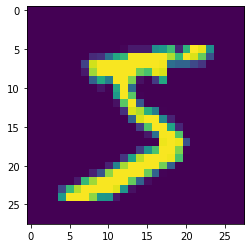

In [50]:
plt.imshow(X_train[0])
print(Y_train[0])

In [51]:
print(X_train.shape)
X_train=X_train.reshape(60000,784)

(60000, 28, 28)


In [52]:
X_train,X_valid,Y_train,Y_valid=train_test_split(X_train,Y_train,test_size=0.2,random_state=42)

In [53]:
model=tf.keras.models.Sequential([
    Dense(64,input_dim=784,activation='relu'),#input_layer
    Dense(32,activation='relu'),
    Dense(10,activation='softmax')#output_layer

])

In [54]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

In [55]:
model.fit(X_train,Y_train,validation_data=(X_valid,Y_valid),epochs=10)

Epoch 1/10
1500/1500 [==============================] - 3s 2ms/step - loss: 2.0298 - accuracy: 0.8021 - val_loss: 0.4570 - val_accuracy: 0.8808
Epoch 2/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3713 - accuracy: 0.9000 - val_loss: 0.3495 - val_accuracy: 0.9092
Epoch 3/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2827 - accuracy: 0.9228 - val_loss: 0.2731 - val_accuracy: 0.9297
Epoch 4/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2407 - accuracy: 0.9336 - val_loss: 0.2519 - val_accuracy: 0.9323
Epoch 5/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2038 - accuracy: 0.9433 - val_loss: 0.2550 - val_accuracy: 0.9373
Epoch 6/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1877 - accuracy: 0.9488 - val_loss: 0.2306 - val_accuracy: 0.9396
Epoch 7/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1663 - accuracy: 0.9537 - val_loss: 0.2410 - val_accuracy:

In [56]:
print(X_test.shape)
print(Y_test.shape)
X_test=X_test.reshape(10000,784)
print(X_test.shape)

(10000, 28, 28)
(10000,)
(10000, 784)


In [57]:

accuracy = model.evaluate(X_test,Y_test)

print("accuracy =", accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.1917 - accuracy: 0.9537
accuracy = [0.19168242812156677, 0.9537000060081482]


In [58]:
#print(X_train_deep.shape,Y_train_deep.shape)

In [59]:

#(X_train_deep, Y_train),(x_test, y_test) = mnist.load_data()
X_train_deep, X_test_deep = X_train_deep / 255.0, X_test_deep / 255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_deep, Y_train_deep, epochs=10)
model.evaluate(X_test_deep, Y_test_deep)


Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2951 - accuracy: 0.9151
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1426 - accuracy: 0.9577
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1072 - accuracy: 0.9673
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0890 - accuracy: 0.9724
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0757 - accuracy: 0.9756
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0684 - accuracy: 0.9780
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0602 - accuracy: 0.9803
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0551 - accuracy: 0.9825
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0485 - accuracy: 0.9842
Epoch 10/10
313/313 [==============================] - 1s 1ms/step - loss: 0.0751 

[0.0750579908490181, 0.9786999821662903]

In [60]:
X_train_deep, X_test_deep = X_train_deep / 255.0, X_test_deep / 255.0

X_train_deep=X_train_deep.reshape(X_train_deep.shape[0],X_train_deep.shape[1],X_train_deep.shape[2],1)
X_test_deep=X_test_deep.reshape(X_test_deep.shape[0],X_test_deep.shape[1],X_test_deep.shape[2],1)
deep_model=tf.keras.models.Sequential([
                                       layers.Conv2D(32,(5,5),activation='relu',input_shape=(28,28,1)),
                                       #layers.Conv2D(64,(3,3),activation='relu'),
                                       layers.Flatten(),
                                       layers.Dense(64,activation='relu'),
                                       layers.Dense(10,activation='softmax')
])
deep_model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics='accuracy')

deep_model.fit(X_train_deep, Y_train_deep, epochs=2)
deep_model.evaluate(X_test_deep, Y_test_deep)


Epoch 1/2
1875/1875 [==============================] - 36s 19ms/step - loss: 0.8708 - accuracy: 0.7532
Epoch 2/2
313/313 [==============================] - 2s 5ms/step - loss: 0.3388 - accuracy: 0.9007


[0.3387521505355835, 0.9006999731063843]

In [61]:
#X_train_deep, X_test_deep= X_train_deep / 255.0, X_test_deep / 255.0
#x_train, x_test = x_train / 255.0, x_test / 255.0
#X_valid_deep,Y_valid_deep=X_valid_deep/255.0,Y_valid_deep/255.0

In [62]:
#X_train_deep,X_valid_deep,Y_train_deep,Y_valid_deep=train_test_split(X_train_deep,Y_train_deep,test_size=0.2,random_state=42)

In [63]:
#deep_model=tf.keras.models.Sequential([
                                       
                                      # Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
                                       #Conv2D(64,(3,3),activation='relu'),
                                       #Conv2D(64,(3,3),activation='relu'),
                                       #Flatten(),
                                       #Dense(64,activation='relu'),
                                       #Dense(10,activation='softmax')
#])

In [64]:
#deep_model.compile(optimizer=tf.keras.optimizers.Adam(),
            #  loss=tf.keras.losses.sparse_categorical_crossentropy,
            #  metrics=['accuracy'])

In [65]:
#deep_model.fit(X_train_deep,Y_train_deep,validation_data=(X_valid_deep,Y_valid_deep),epochs=10)